<a href="https://colab.research.google.com/github/davialvesguerra/trainee-iee/blob/main/5%C2%BA_Per%C3%ADodo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import os

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
path_ = 'gdrive/My Drive/iee/5º Período/'
os.chdir(path_)
os.getcwd()

'/content/gdrive/My Drive/iee/5º Período'

Criando as pastas de treinamento e de teste, caso não existam

In [4]:
if os.path.exists('animals/train') == False:
  os.mkdir('animals/train')


if os.path.exists('animals/test') == False:
  os.mkdir('animals/test')

Listando os arquivos relacionados a cada animal

In [5]:
cats = os.listdir('animals/cats')
cats_src = ['cats/'+x for x in cats]

dogs = os.listdir('animals/dogs')
dogs_src = ['dogs/'+x for x in dogs]

panda = os.listdir('animals/panda')
panda_src = ['panda/'+x for x in panda]

Separando os arquivos dos animais, entre treino e teste, e alocando o caminho nas respectivas listas de treino e teste

Foi feita uma seleção não randômica, dividindo o diretório dos animais com as 70% primeiras fotos de cada tipo de animal para treino e o restante para teste.

In [6]:
N = 1000
size = 0.7


train_src = cats_src[0:int(N*size)]
train_src += dogs_src[0:int(N*size)]
train_src += panda_src[0:int(N*size)]

test_src = cats_src[int(N*size):]
test_src += dogs_src[int(N*size):]
test_src += panda_src[int(N*size):]

A função do tensorflow: .flow_from_directory, consegue rotular cada imagem com base na pasta que a figura esteja. Com isso, caso as pastas para cada tipo de animal não tenham sido criadas, o código abaixo faz a criação das mesmas.

In [7]:
if os.path.exists('animals/train/panda') == False:
  os.mkdir('animals/train/panda')
  os.mkdir('animals/test/panda')

if os.path.exists('animals/train/dogs') == False:
  os.mkdir('animals/train/dogs')
  os.mkdir('animals/test/dogs')

if os.path.exists('animals/train/cats') == False:
  os.mkdir('animals/train/cats')
  os.mkdir('animals/test/cats')


E por fim, e feito uma cópia das fotos dos animais nas pastas originais para a pasta de treino e teste, baseada nos processos de seleção anteriores

In [ ]:
# import shutil

# for value in train_src:

#   dst = 'animals/train/'+value
#   src = 'animals/'+value
  
#   shutil.copyfile(src, dst)


In [ ]:
# for value in test_src:

#   dst = 'animals/test/'+value
#   src = 'animals/'+value
  
#   shutil.copyfile(src, dst)


Importando o ImageDataGenerator, que vai ser responsável pela manipulação das imagens

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Aqui foi feito um pré processo de como que as imagens vão vir

In [9]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


E a função .flow_from_directory, que vai fazer o processo de importação, rotulação das imagens, e converter elas para o tipo do tensor flow

In [11]:
train_generator = train_datagen.flow_from_directory(
        'animals/train',
        target_size=(150, 150),
        batch_size=32
        )

train_generator

Found 2100 images belonging to 3 classes.


In [30]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'animals/test',
        target_size=(150, 150),
        batch_size=32
        )


Found 900 images belonging to 3 classes.


Aqui foi feito todo o processo de montagem dos modelos, selecionando quantas camadas necessárias, filtros e etc

In [12]:
from tensorflow.keras import layers, models

In [37]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))



In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 73984)            

Abaixo as especificação de como será avaliada a perda, método de otimização e formas de metrificar o resultado.

In [39]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [40]:
history = model.fit(train_generator, epochs=5)

Epoch 1/5
66/66 [==============================] - 87s 1s/step - loss: 0.1966 - accuracy: 0.5143
Epoch 2/5
66/66 [==============================] - 86s 1s/step - loss: 0.1516 - accuracy: 0.6348
Epoch 3/5
66/66 [==============================] - 86s 1s/step - loss: 0.1393 - accuracy: 0.6738
Epoch 4/5
66/66 [==============================] - 88s 1s/step - loss: 0.1331 - accuracy: 0.6981
Epoch 5/5
66/66 [==============================] - 90s 1s/step - loss: 0.1237 - accuracy: 0.7181


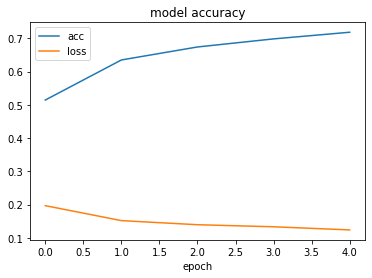

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

Agora vamos utilizar uma Rede já treinada, a Imagenet

In [42]:
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)

83697664/83683744 [==============================] - 0s 0us/step


In [43]:
base_model.trainable = False

In [48]:
inputs = tf.keras.Input(shape=(150, 150, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = tf.keras.layers.GlobalAveragePooling2D()(x)
# A Dense classifier with a single unit (binary classification)
outputs = tf.keras.layers.Dense(3)(x)
model = tf.keras.Model(inputs, outputs)

In [49]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [50]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_14 (Dense)            (None, 3)                 6147      
                                                                 
Total params: 20,867,627
Trainable params: 6,147
Non-trainable params: 20,861,480
_________________________________________________________________


In [51]:
history1 = model.fit(train_generator, epochs=4)

Epoch 1/4
66/66 [==============================] - 164s 2s/step - loss: 0.2965 - accuracy: 0.7776
Epoch 2/4
66/66 [==============================] - 161s 2s/step - loss: 0.1558 - accuracy: 0.8724
Epoch 3/4
66/66 [==============================] - 160s 2s/step - loss: 0.1122 - accuracy: 0.9124
Epoch 4/4
66/66 [==============================] - 158s 2s/step - loss: 0.0969 - accuracy: 0.9386
